In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
import scipy.stats
import seaborn as sns
import math
import os
import json
import ast
import matplotlib.patches as mpatches
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import std, mean, sqrt
pd.options.mode.copy_on_write = True

In [19]:
chosen_stim_df = pd.read_csv("csvs/chosen_stim_excluded.csv")
chosen_stim_df.drop('Unnamed: 0', axis="columns", inplace=True)

<b>ANALYSING THE CHOSEN STIMULI</b>
<p> Doing this using 4 mixed effects models - testing effect of timepoint and stimulus type on ratings </p>
<p>List of models to run:
<li>'Valence ~ trial_type*Timepoint'
<li>'Arousal ~ trial_type*Timepoint'
<li>'Disgust ~ trial_type*Timepoint'
<li>'Fear ~ trial_type*Timepoint'

In [20]:
#create long form df which allows for this
long_chosen_stim_df=pd.DataFrame()
for i in chosen_stim_df.index:
    row=chosen_stim_df.loc[i]
    #timepoint=['unpleasan']
    timepoint_1=pd.DataFrame({
    'participant_no': [row.participant_no],
    'Vid': [row['Vid']],
    'trial_type': [row.trial_type],
    'Valence': [row.unpleasant_1],
    'Arousal': [row.arousing_1],
    'Fear': [row.frightening_1],
    'Disgust': [row.disgusting_1],
    'Timepoint': 1.0
    })
    timepoint_2=pd.DataFrame({
        'participant_no': [row.participant_no],
        'Vid': [row['Vid']],
        'trial_type': [row.trial_type],
        'Valence': [row.unpleasant_2],
        'Arousal': [row.arousing_2],
        'Fear': [row.frightening_2],
        'Disgust': [row.disgusting_2],
        'Timepoint': 2.0
    })
    long_chosen_stim_df_row=pd.concat([timepoint_1, timepoint_2])
    long_chosen_stim_df=pd.concat([long_chosen_stim_df_row, long_chosen_stim_df])
    long_chosen_stim_df=long_chosen_stim_df[long_chosen_stim_df.trial_type!="points"]

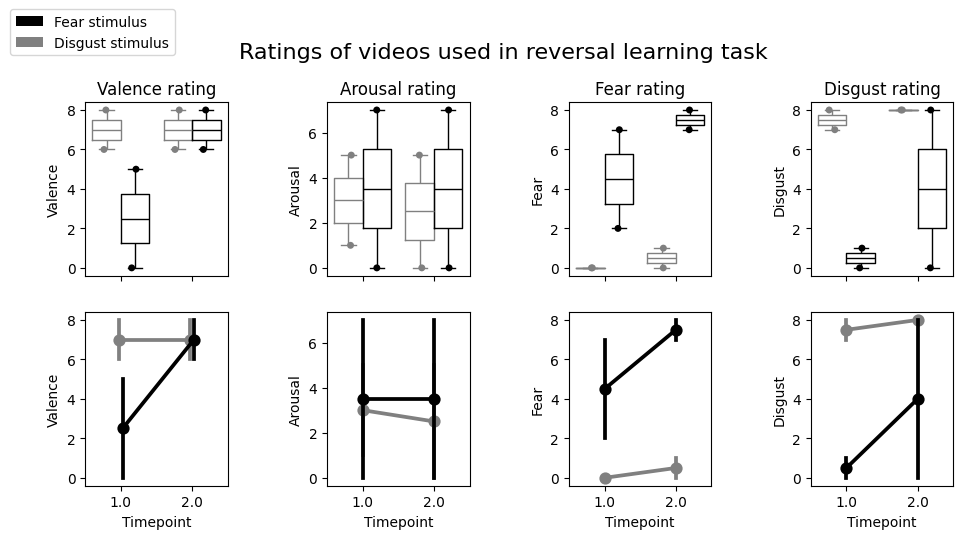

In [21]:
#example plot
fig, axes = plt.subplots(2,4, sharex='col', sharey='col')
title="Ratings of videos used in reversal learning task"
plt.suptitle(title, fontsize=16)
fig.tight_layout(pad=1.5)
fig.set_size_inches(10, 5)

palette = {'fear': '0',
            'disgust': '0.5'}
sns.stripplot(data=long_chosen_stim_df, ax=axes[0,0], x='Timepoint', y='Valence', hue='trial_type', dodge=True, palette=palette)
sns.boxplot(data=long_chosen_stim_df, ax=axes[0,0], x='Timepoint', y='Valence', hue='trial_type', fill=False, palette=palette, linewidth=1)
axes[0,0].get_legend().set_visible(False)
axes[0,0].set_title("Valence rating") 

sns.pointplot(data=long_chosen_stim_df, ax=axes[1,0], x='Timepoint', y='Valence', hue='trial_type', dodge=True, palette=palette)
axes[1,0].get_legend().set_visible(False)

sns.stripplot(data=long_chosen_stim_df, ax=axes[0,1], x='Timepoint', y='Arousal', hue='trial_type', dodge=True, palette=palette)
sns.boxplot(data=long_chosen_stim_df, ax=axes[0,1], x='Timepoint', y='Arousal', hue='trial_type', fill=False, palette=palette, linewidth=1)
axes[0,1].get_legend().set_visible(False)
axes[0,1].set_title("Arousal rating") 

sns.pointplot(data=long_chosen_stim_df, ax=axes[1,1], x='Timepoint', y='Arousal', hue='trial_type', dodge=False, palette=palette)
axes[1,1].get_legend().set_visible(False)

sns.stripplot(data=long_chosen_stim_df, ax=axes[0,2], x='Timepoint', y='Fear', hue='trial_type', dodge=True, palette=palette)
sns.boxplot(data=long_chosen_stim_df, ax=axes[0,2], x='Timepoint', y='Fear', hue='trial_type', fill=False, palette=palette, linewidth=1)
axes[0,2].get_legend().set_visible(False)
axes[0,2].set_title("Fear rating") 

sns.pointplot(data=long_chosen_stim_df, ax=axes[1,2], x='Timepoint', y='Fear', hue='trial_type', dodge=False, palette=palette)
axes[1,2].get_legend().set_visible(False)

sns.stripplot(data=long_chosen_stim_df, ax=axes[0,3], x='Timepoint', y='Disgust', hue='trial_type', dodge=True, palette=palette)
sns.boxplot(data=long_chosen_stim_df, ax=axes[0,3], x='Timepoint', y='Disgust', hue='trial_type', fill=False, palette=palette, linewidth=1)
axes[0,3].get_legend().set_visible(False)
axes[0,3].set_title("Disgust rating") 

sns.pointplot(data=long_chosen_stim_df, ax=axes[1,3], x='Timepoint', y='Disgust', hue='trial_type', dodge=False, palette=palette)
axes[1,3].get_legend().set_visible(False)

plt.figlegend(loc='center left', bbox_to_anchor=(0,1),  handles=[mpatches.Patch(facecolor='0'), mpatches.Patch(facecolor='0.5')], labels=['Fear stimulus', 'Disgust stimulus'])
plt.show()

In [22]:
##mixed effects model Valence
data=long_chosen_stim_df.reset_index()
data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
formula = 'Valence ~ trial_type*Timepoint'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Valence 
No. Observations:     8          Method:                REML    
No. Groups:           2          Scale:                 4.6249  
Min. group size:      4          Log-Likelihood:        -10.1268
Max. group size:      4          Converged:             Yes     
Mean group size:      4.0                                       
----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------
Intercept            16.000    7.604  2.104 0.035   1.097 30.903
trial_type           -9.000    4.809 -1.872 0.061 -18.425  0.425
Timepoint            -4.500    4.809 -0.936 0.349 -13.925  4.925
trial_type:Timepoint  4.500    3.041  1.480 0.139  -1.461 10.461
Group Var             0.004                                     



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\1179318345.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the 

In [23]:
##mixed effects model Arousal
data=long_chosen_stim_df.reset_index()
data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
formula = 'Arousal ~ trial_type*Timepoint'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Arousal
No. Observations:     8          Method:                REML   
No. Groups:           2          Scale:                 1.1250 
Min. group size:      4          Log-Likelihood:        -9.3345
Max. group size:      4          Converged:             Yes    
Mean group size:      4.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             3.500    4.710  0.743 0.457 -5.732 12.732
trial_type           -0.000    2.372 -0.000 1.000 -4.648  4.648
Timepoint            -1.000    2.372 -0.422 0.673 -5.648  3.648
trial_type:Timepoint  0.500    1.500  0.333 0.739 -2.440  3.440
Group Var            16.249   25.450                           



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\1078477652.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)


In [24]:
##mixed effects model Fear
data=long_chosen_stim_df.reset_index()
data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
formula = 'Fear ~ trial_type*Timepoint'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

             Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Fear   
No. Observations:      8          Method:                REML   
No. Groups:            2          Scale:                 3.3736 
Min. group size:       4          Log-Likelihood:        -9.4965
Max. group size:       4          Converged:             Yes    
Mean group size:       4.0                                      
----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------
Intercept            -2.500    6.494 -0.385 0.700 -15.228 10.228
trial_type            2.000    4.107  0.487 0.626  -6.050 10.050
Timepoint            -2.000    4.107 -0.487 0.626 -10.050  6.050
trial_type:Timepoint  2.500    2.598  0.962 0.336  -2.591  7.591
Group Var             0.004                                     



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\3636692474.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the 

In [25]:
##mixed effects model Disgust
data=long_chosen_stim_df.reset_index()
data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
formula = 'Disgust ~ trial_type*Timepoint'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Disgust 
No. Observations:      8          Method:                REML    
No. Groups:            2          Scale:                 7.9166  
Min. group size:       4          Log-Likelihood:        -11.2912
Max. group size:       4          Converged:             Yes     
Mean group size:       4.0                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept             17.000    9.958  1.707 0.088  -2.517 36.517
trial_type           -10.000    6.291 -1.589 0.112 -22.331  2.331
Timepoint             -2.500    6.291 -0.397 0.691 -14.831  9.831
trial_type:Timepoint   3.000    3.979  0.754 0.451  -4.799 10.799
Group Var              0.396    1.677                            



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\3413780734.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


<b>CHECK POINTS RATINGS</b>
<p>Aim: check whether points block differs from other blocks in terms of ratings</p>
<p>List of models to run: </p>
<li>'disgusting_1 ~ trial_type'
<li>'frightening_1 ~ trial_type'
<li>'unpleasant_1 ~ trial_type'
<li>'arousing_1 ~ trial_type'

In [45]:
data=chosen_stim_df[['participant_no', 'trial_type', 'unpleasant_1', 'arousing_1', 'disgusting_1', 'frightening_1']]
data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
formula = 'disgusting_1 ~ trial_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: disgusting_1
No. Observations: 6       Method:             REML        
No. Groups:       2       Scale:              6.2708      
Min. group size:  3       Log-Likelihood:     -10.9366    
Max. group size:  3       Converged:          Yes         
Mean group size:  3.0                                     
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept    8.833     2.705   3.266  0.001   3.532  14.135
trial_type  -2.750     1.252  -2.196  0.028  -5.204  -0.296
Group Var    0.000                                         



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\3650014271.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the b

In [46]:
data=chosen_stim_df[['participant_no', 'trial_type', 'unpleasant_1', 'arousing_1', 'disgusting_1', 'frightening_1']]
data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
formula = 'frightening_1 ~ trial_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: frightening_1
No. Observations: 6       Method:             REML         
No. Groups:       2       Scale:              8.4053       
Min. group size:  3       Log-Likelihood:     -11.5486     
Max. group size:  3       Converged:          No           
Mean group size:  3.0                                      
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.833     3.143  0.265  0.791  -5.328   6.994
trial_type     0.500     1.450  0.345  0.730  -2.341   3.341
Group Var      0.150                                        



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\2135355347.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

In [47]:
data=chosen_stim_df[['participant_no', 'trial_type', 'unpleasant_1', 'arousing_1', 'disgusting_1', 'frightening_1']]
data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
formula = 'unpleasant_1 ~ trial_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: unpleasant_1
No. Observations: 6       Method:             REML        
No. Groups:       2       Scale:              6.6249      
Min. group size:  3       Log-Likelihood:     -11.0466    
Max. group size:  3       Converged:          Yes         
Mean group size:  3.0                                     
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept    7.500     2.780   2.698  0.007   2.051  12.949
trial_type  -1.500     1.287  -1.166  0.244  -4.022   1.022
Group Var    0.001                                         



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\417811263.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
U:\Documents\envs\reversal_learning_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the bo

In [48]:
data=chosen_stim_df[['participant_no', 'trial_type', 'unpleasant_1', 'arousing_1', 'disgusting_1', 'frightening_1']]
data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)
formula = 'arousing_1 ~ trial_type'
md=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
results = md.fit()
print(results.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: arousing_1
No. Observations: 6       Method:             REML      
No. Groups:       2       Scale:              4.2222    
Min. group size:  3       Log-Likelihood:     -10.9273  
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      3.167    2.754  1.150 0.250 -2.231  8.564
trial_type    -0.000    1.027 -0.000 1.000 -2.014  2.014
Group Var      5.315    5.342                           



C:\Users\eb08\AppData\Local\Temp\ipykernel_10124\182310558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['disgust', 'fear', 'points'], [1.0,2.0, 3.0], inplace=True)


Text(258.7682291666667, 0.5, 'Fear')

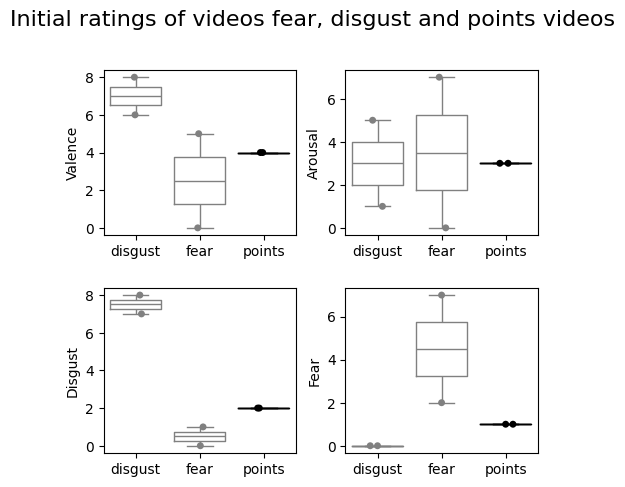

In [105]:
#example plot for this data
data=chosen_stim_df[['participant_no', 'trial_type', 'unpleasant_1', 'arousing_1', 'disgusting_1', 'frightening_1']].sort_values('trial_type')
fig, axes = plt.subplots(2,2)
title="Initial ratings of videos fear, disgust and points videos"
plt.suptitle(title, fontsize=16)
fig.tight_layout(pad=1.5)
fig.set_size_inches(5, 5)

order=['fear', 'disgust', 'points']
palette = {'fear': '0.5',
            'disgust': '0.5',
            'points': '0'}
sns.boxplot(data=data, ax=axes[0,0],   x='trial_type', hue='trial_type', y='unpleasant_1', palette=palette, legend=False, fill=False, linewidth=1, hue_order=order)
sns.stripplot(data=data, ax=axes[0,0],  x='trial_type', hue='trial_type', y='unpleasant_1', palette=palette, legend=False, dodge=False, hue_order=order)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Valence')

sns.boxplot(data=data, ax=axes[0,1], x='trial_type', hue='trial_type', y='arousing_1', palette=palette, legend=False, fill=False, linewidth=1, hue_order=order)
sns.stripplot(data=data, ax=axes[0,1], x='trial_type', hue='trial_type', y='arousing_1', palette=palette, legend=False, dodge=False, hue_order=order)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Arousal')

sns.boxplot(data=data, ax=axes[1,0], x='trial_type', hue='trial_type', y='disgusting_1', palette=palette, legend=False, fill=False, linewidth=1, hue_order=order)
sns.stripplot(data=data, ax=axes[1,0], x='trial_type', hue='trial_type', y='disgusting_1', palette=palette, legend=False, dodge=False, hue_order=order)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Disgust')

sns.boxplot(data=data, ax=axes[1,1], x='trial_type',  hue='trial_type', y='frightening_1', palette=palette, legend=False, fill=False, linewidth=1, hue_order=order)
sns.swarmplot(data=data, ax=axes[1,1], x='trial_type',  hue='trial_type',  y='frightening_1', palette=palette, legend=False, dodge=False, hue_order=order)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Fear')